In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
from datetime import datetime
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [2]:
data = pd.read_csv('data/walmart_cleaned.csv')
data.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Week'] = pd.to_datetime(data['Date']).dt.week
data['DayOfTheWeek'] = data['Date'].dt.dayofweek
data['Day'] = pd.to_datetime(data['Date']).dt.day

In [4]:
data.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,DayOfTheWeek,Day
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,2010,2,5,4,5
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,2010,2,5,4,5
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,2010,2,5,4,5
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,2010,2,5,4,5
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315,2010,2,5,4,5


In [5]:
data.columns

Index(['Unnamed: 0', 'Store', 'Date', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Year',
       'Month', 'Week', 'DayOfTheWeek', 'Day'],
      dtype='object')

In [6]:
df = data[['Date', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']]

In [7]:
from sklearn.neighbors import NearestNeighbors

In [8]:
df.set_index('Date', inplace=True)
X = df.values

In [9]:
X.shape

(421570, 14)

In [10]:
df.head()

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,
2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [11]:
# instantiate model
nbrs = NearestNeighbors(n_neighbors = 100)
# fit model
nbrs.fit(X)

NearestNeighbors(n_neighbors=100)

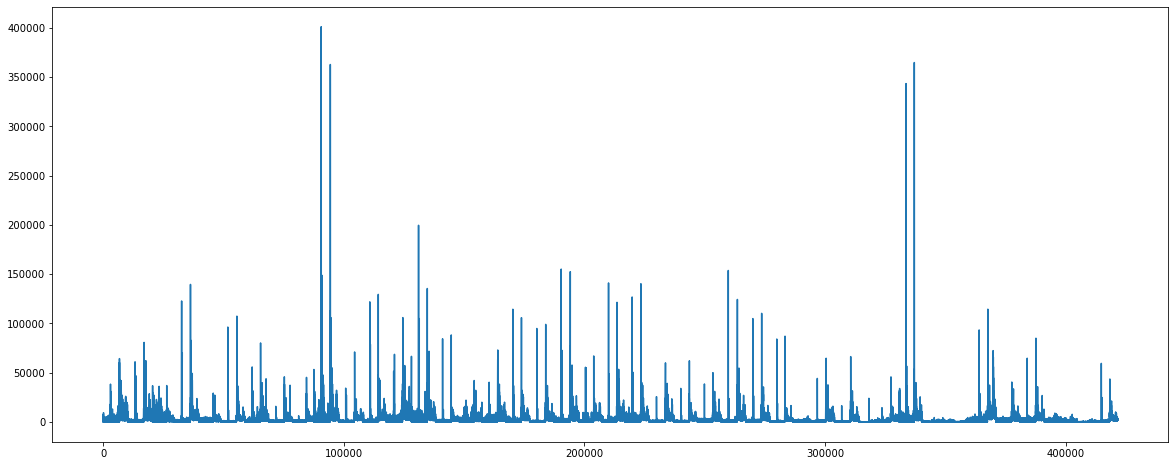

In [12]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
# plot mean of k-distances of each observation
plt.figure(figsize=(20,8))
plt.plot(distances.mean(axis =1))

In [13]:
distances.shape, df.shape

((421570, 100), (421570, 14))

In [14]:
indexes.shape

(421570, 100)

In [15]:
distances.mean(axis =1).shape

(421570,)

In [16]:
# visually determine cutoff values > 35000
outlier_index = np.where(distances.mean(axis = 1) > 50000)
#outlier_index

In [17]:
# filter outlier values
outlier_values = data.iloc[outlier_index]
outlier_values.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,DayOfTheWeek,Day
6755,6755,1,2011-11-25,1,92.0,186516.35,60.14,3.236,410.31,98.0,55805.51,8.0,554.92,218.467621,7.866,3,151315,2011,11,47,4,25
6767,6767,1,2011-11-25,1,72.0,203670.47,60.14,3.236,410.31,98.0,55805.51,8.0,554.92,218.467621,7.866,3,151315,2011,11,47,4,25
13248,13287,2,2010-11-26,1,72.0,285353.53,62.98,2.735,0.00,0.0,0.00,0.0,0.00,211.406287,8.163,3,202307,2010,11,47,4,26
16989,17028,2,2011-11-25,1,92.0,238066.17,56.36,3.236,919.71,62.0,77451.26,23.0,1589.43,218.113027,7.441,3,202307,2011,11,47,4,25
17004,17043,2,2011-11-25,1,72.0,263558.03,56.36,3.236,919.71,62.0,77451.26,23.0,1589.43,218.113027,7.441,3,202307,2011,11,47,4,25


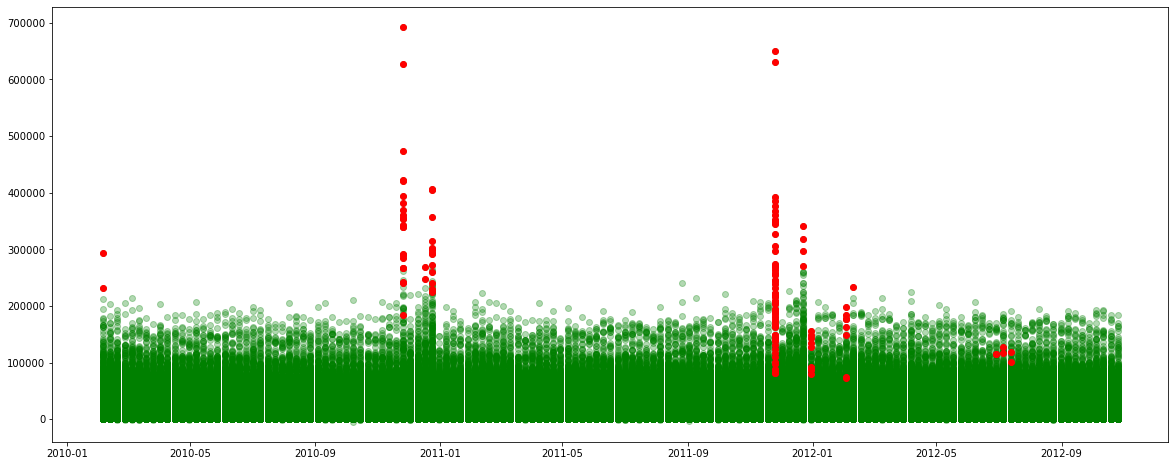

In [18]:
# plot data
plt.figure(figsize=(20,8))
plt.scatter(df.index,df["Weekly_Sales"] ,color = "g",alpha=0.3)
# plot outlier values (where outlier values= df.iloc[outlier_index])
otlr_val = df.iloc[outlier_index]
plt.scatter(otlr_val.index,otlr_val["Weekly_Sales"], color = "r")

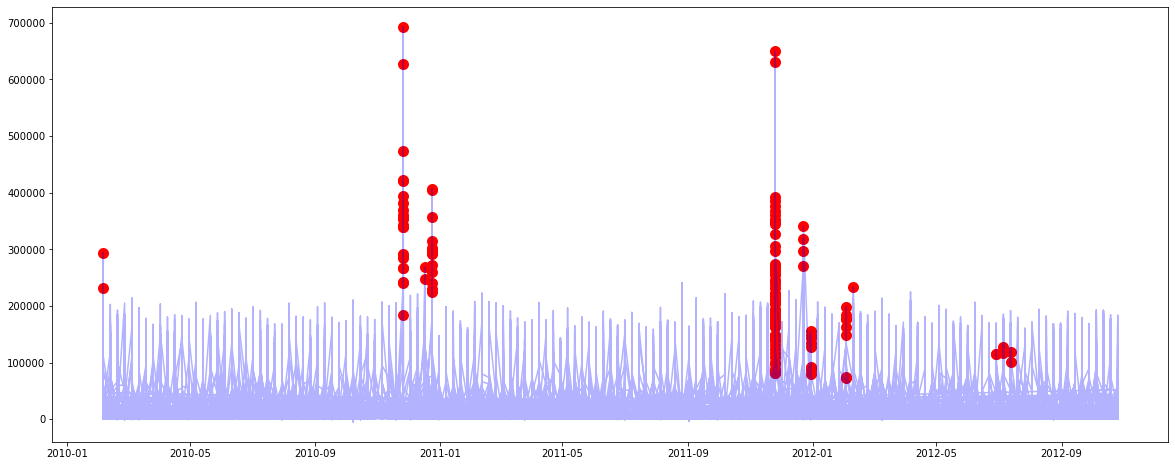

In [19]:
# plot data
plt.figure(figsize=(20,8))
plt.plot(df.index,df["Weekly_Sales"] ,color = "b",alpha = 0.3)
# plot outlier values
plt.scatter(otlr_val.index,otlr_val["Weekly_Sales"], color='r',linewidths=5)

In [20]:
df.iloc[outlier_index].head()

,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,
2011-11-25,1,92.0,186516.35,60.14,3.236,410.31,98.0,55805.51,8.0,554.92,218.467621,7.866,3,151315
2011-11-25,1,72.0,203670.47,60.14,3.236,410.31,98.0,55805.51,8.0,554.92,218.467621,7.866,3,151315
2010-11-26,1,72.0,285353.53,62.98,2.735,0.00,0.0,0.00,0.0,0.00,211.406287,8.163,3,202307
2011-11-25,1,92.0,238066.17,56.36,3.236,919.71,62.0,77451.26,23.0,1589.43,218.113027,7.441,3,202307
2011-11-25,1,72.0,263558.03,56.36,3.236,919.71,62.0,77451.26,23.0,1589.43,218.113027,7.441,3,202307


In [21]:
i = df.iloc[outlier_index]

In [22]:
i.shape

(128, 14)

In [24]:
# i.loc[i['Weekly_Sales'] <= 156432]

In [25]:
# i.loc[data['Weekly_Sales'] > 156431.46]